In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [2]:
fish_data = pd.read_csv('Fish.csv')
features = fish_data.drop('Species', axis=1)
labels = fish_data['Species']
#fish_data

In [3]:
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_enc = label_encoder.fit_transform(fish_data["Species"])

## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

features_scaled = MinMaxScaler()
features_scaled = features_scaled.fit_transform( features )



In [4]:
from sklearn.model_selection import train_test_split

features = fish_data.drop(['Species'], axis = 1)
labels = fish_data['Species']
## for the original data set
# features_train, features_test, labels_train, labels_test = train_test_split(features, labels_enc,test_size=0.3, random_state=27)
## for the scaled data set
# features_train_scaled, features_test_scaled, labels_train_scaled, labels_test_scaled = train_test_split(features_scaled, labels_enc,test_size=0.3, random_state=27)

####Logistic Regression Discussion:
For the original data set, the accuracy is higher than the scaled data set, and same thing for the cross validation values. Therefore, that is not the best algorithm to choose but still pretty good.

Logistic regression for the original data set

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression( max_iter = 100000 )

# Fit the model
model.fit(features, labels_enc)

# Predict data points 
labels_predicted = model.predict(features)
#labels_predicted_test = model.predict(features)

# Print accuracy scores
print('Model accuracy score:', accuracy_score(labels_enc, labels_predicted))
# print('Model accuracy score test:', accuracy_score(labels, labels_predicted_test))

scores = cross_val_score(model, features, labels_enc, cv = 10)
#scores_test = cross_val_score(model, features_test, labels_test, cv = 10)
scores

Model accuracy score: 0.9685534591194969


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

array([0.625     , 1.        , 0.9375    , 1.        , 1.        ,
       0.9375    , 0.9375    , 0.9375    , 0.875     , 0.93333333])

Logistic regression for the scaled data set

In [6]:
model = LogisticRegression( max_iter = 100000 )

# Fit the model
model.fit(features_scaled, labels_enc)

# Predict data points 
labels_predicted = model.predict(features_scaled)
#labels_predicted_test = model.predict(features)

# Print accuracy scores
print('Model accuracy score:', accuracy_score(labels_enc, labels_predicted))
# print('Model accuracy score test:', accuracy_score(labels, labels_predicted_test))

scores = cross_val_score(model, features_scaled, labels_enc, cv = 10)
#scores_test = cross_val_score(model, features_test, labels_test, cv = 10)
scores

Model accuracy score: 0.710691823899371


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


array([0.4375    , 0.625     , 0.6875    , 0.8125    , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.6875    , 0.46666667])

####Decision Trees Discussion:
The accuracies are the same (100% maybe because of over-fiting), but the cross validation values are different and pretty small. Therefore, that is not the best algorithm to choose.

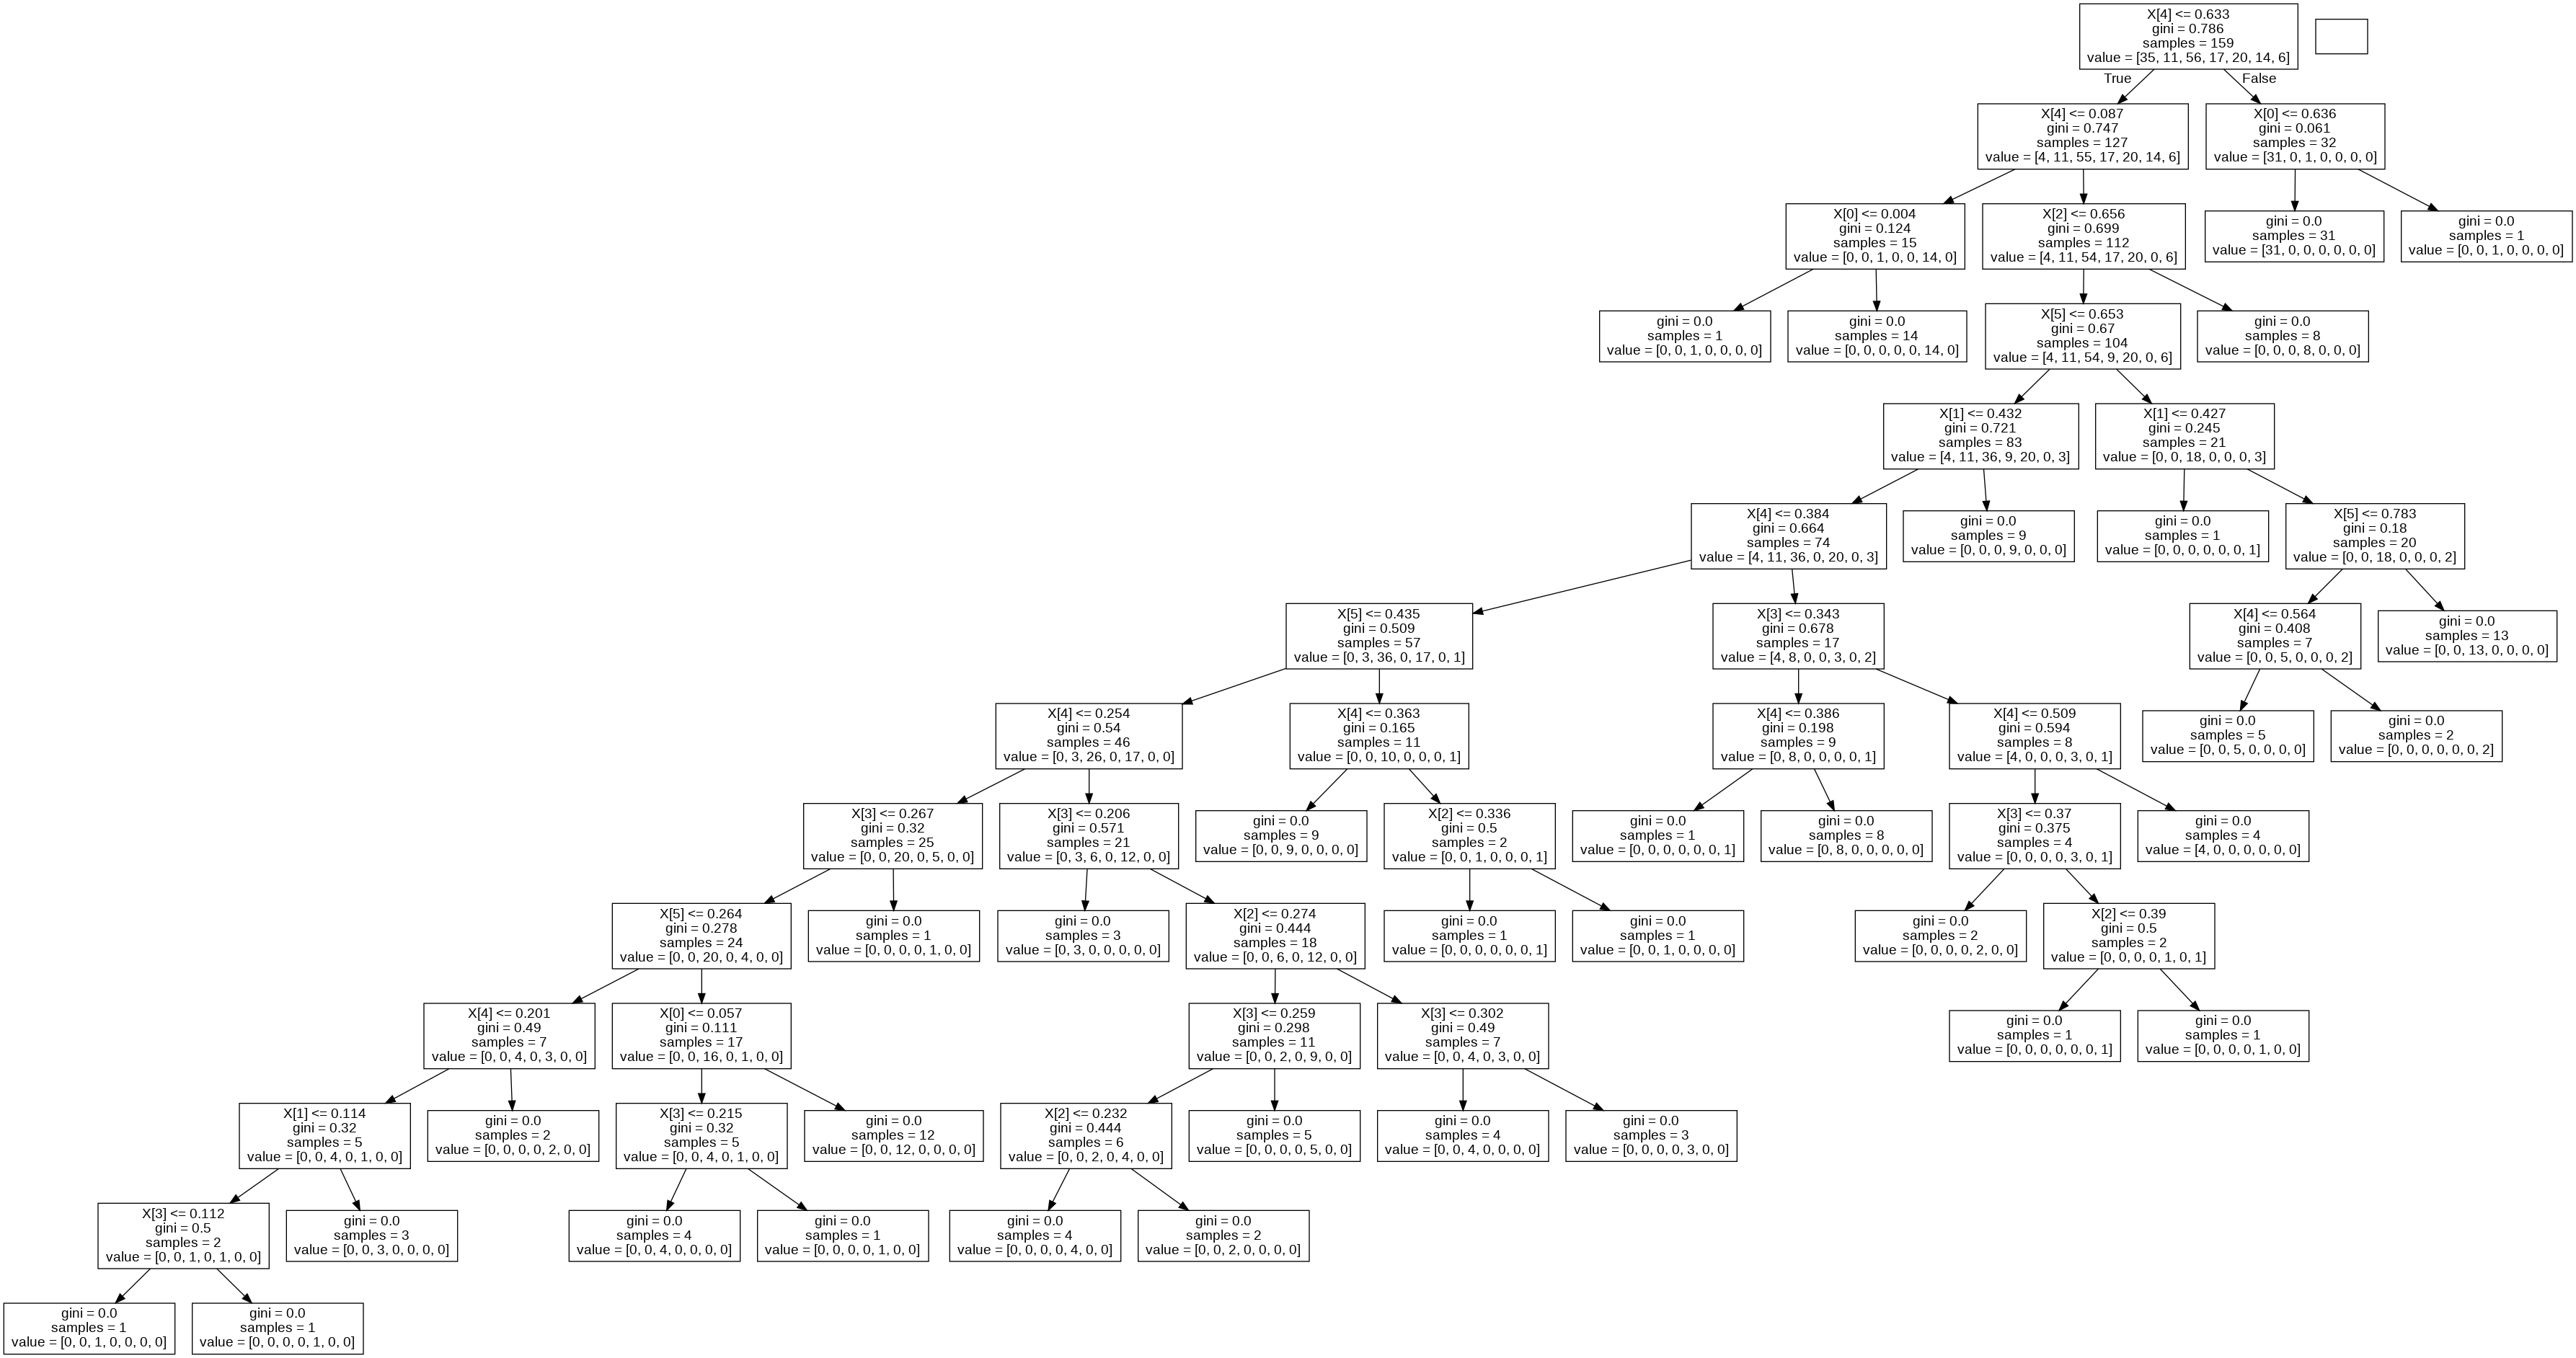

In [7]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus


clf = DecisionTreeClassifier(random_state=0)

clf = clf.fit(features_scaled, labels_enc)
dot_data = tree.export_graphviz(clf)

graph = pydotplus.graph_from_dot_data(dot_data)
## get the png version of the graph
graph.write_png('Fish.png')
## get the pdf version of the graph
graph.write_pdf('Fish.pdf')
# Show graph
Image(graph.create_png())

In [8]:
##features_train, features_test, labels_train, labels_test = train_test_split(features, labels_enc, train_size = 0.7)

clf = tree.DecisionTreeClassifier().fit(features, labels_enc)

predicted_labels_enc = clf.predict(features)
accuracy_train = accuracy_score(labels_enc, predicted_labels_enc)
print('classifier accuracy train:', accuracy_train)

predicted_labels_test = clf.predict(features)
accuracy_test = accuracy_score(labels_enc, predicted_labels_enc)
print('classifier accuracy test:', accuracy_test)
scores = cross_val_score(clf, features, labels_enc, cv = 10)
scores 

classifier accuracy train: 1.0
classifier accuracy test: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


array([0.3125    , 0.75      , 0.6875    , 0.75      , 0.5       ,
       0.8125    , 0.5       , 0.5       , 0.5625    , 0.53333333])

In [9]:
clf = tree.DecisionTreeClassifier().fit(features_scaled, labels_enc)

predicted_labels_enc = clf.predict(features_scaled)
accuracy_train = accuracy_score(labels_enc, predicted_labels_enc)
print('classifier accuracy train:', accuracy_train)

predicted_labels_test = clf.predict(features_scaled)
accuracy_test = accuracy_score(labels_enc, predicted_labels_enc)
print('classifier accuracy test:', accuracy_test)
scores = cross_val_score(clf, features_scaled, labels_enc, cv = 10)
scores 

classifier accuracy train: 1.0
classifier accuracy test: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


array([0.375 , 0.8125, 0.6875, 0.75  , 0.5625, 0.75  , 0.625 , 0.5   ,
       0.75  , 0.4   ])

####K-Neighbors Regressor Discussion:
Here, we have the same prediction for the same random values, but the cross validation values are different, sometimes they are null and sometimes negative. Therefore, this is not the best algorithm to choose.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors = 2)
neigh.fit(features_scaled, labels_enc)
print(neigh.predict([[9.1, 1.5, 7.8, 6.8, 5, 7.5]]))
scores = cross_val_score(neigh, features, labels_enc, cv = 10)
scores 

[3.]


array([  0.        ,   0.        ,  -0.19230769,  -2.18215613,
       -17.4375    ,   0.        ,   0.        ,   0.        ,
         0.        , -18.01785714])

In [11]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors = 2)
neigh.fit(features_scaled, labels_enc)
print(neigh.predict([[9.1, 1.5, 7.8, 6.8, 5, 7.5]]))
scores = cross_val_score(neigh, features_scaled, labels_enc, cv = 10)
scores 

[3.]


array([  0.        ,   1.        ,  -0.25641026,  -1.60223048,
       -11.4375    ,   0.        ,   0.        ,   0.        ,
         0.        , -31.41071429])

####Neural Network Discussion:
The cross validation values are different, sometimes they are null and sometimes negative. Therefore, this is not the best algorithm to choose.

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
regr = MLPRegressor(random_state=1, max_iter = 10000).fit(features, labels_enc)
regr.predict(features[:2])
regr.score(features, labels_enc)

scores = cross_val_score(regr, features, labels_enc, cv = 10)
scores 

array([   0.        ,    0.        , -122.60621692, -123.42118944,
       -571.22161684,    0.        ,    0.        ,    0.        ,
          0.        , -790.19197998])

In [13]:
regr = MLPRegressor(random_state=1, max_iter = 10000).fit(features_scaled, labels_enc)
regr.predict(features_scaled[:2])
regr.score(features_scaled, labels_enc)

scores = cross_val_score(regr, features_scaled, labels_enc, cv = 10)
scores 

array([  0.        ,   0.        ,   0.39217981,  -1.9902519 ,
        -6.95838514,   0.        ,   0.        ,   0.        ,
         0.        , -19.56132944])

####Support Vector Machines Discussion:
For the original data set and the scaled data set, we have the same accuracies (100%) and the same cross validation values. We can also notice that the values for the cross validation are high except the first one.
 Therefore, this is the best algorithm to choose.

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(C = 1000, kernel = 'linear' ))
clf = clf.fit(features, labels_enc)
clf_train_predict = clf.predict( features )
clf_test_predict = clf.predict( features )

train_accuracy = accuracy_score(labels_enc, clf_train_predict)
print('train_accuracy:', train_accuracy)
test_accuracy = accuracy_score( labels_enc, clf_test_predict )
print('test_accuracy:', test_accuracy)

scores = cross_val_score(clf, features, labels_enc, cv = 10)
scores

train_accuracy: 1.0
test_accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


array([0.5       , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.9375    , 0.875     , 0.875     , 0.93333333])

In [15]:
clf = make_pipeline(StandardScaler(), SVC(C = 1000, kernel = 'linear' ))
clf = clf.fit(features_scaled, labels_enc)
clf_train_predict = clf.predict( features_scaled )
clf_test_predict = clf.predict( features_scaled )

train_accuracy = accuracy_score(labels_enc, clf_train_predict)
print('train_accuracy:', train_accuracy)
test_accuracy = accuracy_score( labels_enc, clf_test_predict )
print('test_accuracy:', test_accuracy)

scores = cross_val_score(clf, features_scaled, labels_enc, cv = 10)
scores

train_accuracy: 1.0
test_accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


array([0.5       , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.9375    , 0.875     , 0.875     , 0.93333333])

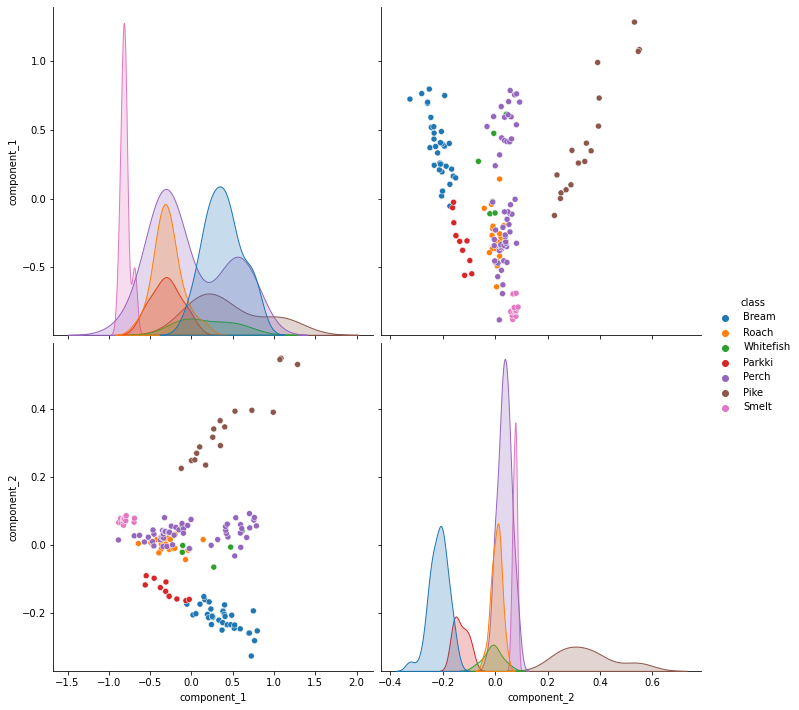

In [16]:
from sklearn.decomposition import PCA

num_components = 2
data_pca = PCA(n_components = num_components)

data_pca.fit(features_scaled)
data_pca_2D = data_pca.transform(features_scaled)
#print('data_pca_2D.shape:', data_pca_2D.shape)

df_data_pca_2D = pd.DataFrame(data_pca_2D, columns = ['component_1', 'component_2'])

df_data_pca_2D.insert(num_components, 'class', labels)  #loc, column, value

sns.pairplot( data = df_data_pca_2D, hue='class', height=5)